Loading graph from file...
Visualizing coauthor network...
Visualizing top 100 nodes by degree...


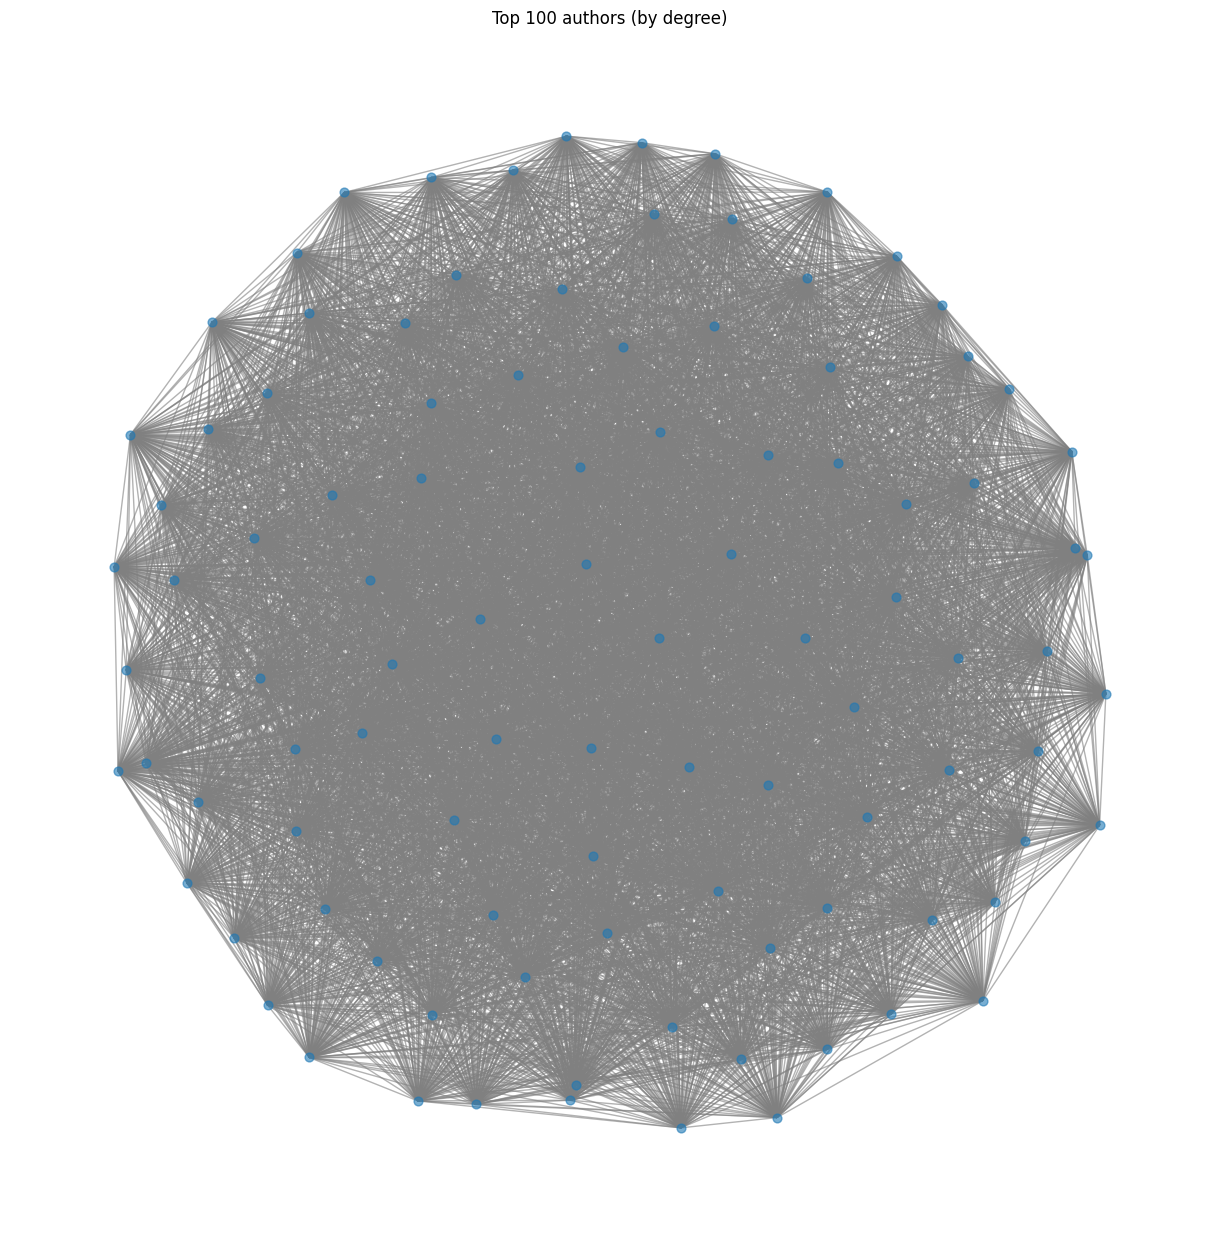

Extracting features for ML...
21012564 collaboration pairs extracted.
Training model...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  20449808
           1       1.00      1.00      1.00    562756

    accuracy                           1.00  21012564
   macro avg       1.00      1.00      1.00  21012564
weighted avg       1.00      1.00      1.00  21012564

Interpreting model...


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RandomForestClassifier()

In [1]:
#%run AcademicCollabProject.py

from src.preprocessing import build_author_graph
from src.features import extract_features_from_graph
from src.model import train_model, evaluate_model, explain_model
from src.visualize import draw_collab_graph
from sklearn.model_selection import train_test_split

import os
import pickle # For saving/loading graphs

"""
Focus on:
- Academic collaboration patterns
- Coauthorship, citation impact, publication behavior
- Classifying strong vs. weak collaborations

All of this can be modeled in a single unified author graph.
- No need to separate papers, authors, and fields into distinct .pk graphs unless doing:
- Multi-type message passing (e.g., with heterogeneous GNNs)
- Explicit field-level domain training
"""

def main():
    raw_data_dir = os.path.join("data", "raw")
    graph_cache = os.path.join("data", "author_graph.gpickle")

    papers_file = os.path.join(raw_data_dir, "Papers_CS_20190919.tsv")
    authors_file = os.path.join(raw_data_dir, "PAuAf_CS_20190919.tsv")
    citations_file = os.path.join(raw_data_dir, "PR_CS_20190919.tsv")

    # Decide whether to load or build the graph
    if os.path.exists(graph_cache):
        print("Loading graph from file...")
        with open(graph_cache, "rb") as f:
            G = pickle.load(f)
    else:
        print("Building author collaboration graph...")
        G = build_author_graph(papers_file, authors_file, citations_file)

        with open(graph_cache, "wb") as f:
            pickle.dump(G, f)

        print("Graph saved to:", graph_cache)

    print("Visualizing coauthor network...")
    #draw_collab_graph(G)
    draw_collab_graph(G, max_nodes=100)

    print("Extracting features for ML...")
    X, y = extract_features_from_graph(G)
    print(f"{len(X)} collaboration pairs extracted.")

    # added - Train-test split
    print("Splitting data into train and test sets...")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print("Training model...")
    model = train_model(X_train, y_train)
    
    print("Evaluating model on test data...")
    evaluate_model(model, X_test, y_test)

    print("Interpreting model (SHAP on test data)...")
    explain_model(model, X_test)

if __name__ == "__main__":
    main()